In [1]:
import os
import pandas as pd
import sys
pd.set_option('display.max_columns', None)
import pickle
import matplotlib.pyplot as plt
import torch as pt
import numpy as np
import math
from sklearn.model_selection import train_test_split
import shap
import random

In [15]:
feature=['全机重量', '马赫数', '气压高度', '真空速', '升降速度', '攻角', '侧滑角', '动压', '法向过载', '侧向过载',
       '轴向过载', '俯仰角', '滚转角', '航向角', '滚转速率', '俯仰速率', '偏航速率', '左鸭翼', '右鸭翼',
       '俯仰角加速度', '滚转角加速度', '偏航加速度', '左前襟', '右前襟', '左外副翼', '右外副翼', '左内副翼',
       '右内副翼', '左方向舵', '右方向舵']
strain=['机翼剪力', '机翼弯矩', '鸭翼剪力', '垂尾剪力', '鸭翼弯矩', '机身弯矩']

In [4]:
def load_data(plane):
    print('[***] Plane ' + plane)
    dir = '../../data_per_plane_new/'
    data = pd.read_csv(dir + plane + '_data.csv', encoding='utf-8')
    X = np.asarray(data.get(data.columns.values.tolist()[:30]))
    Y = np.asarray(data.get(data.columns.values.tolist()[30:]))
    print('[***] Data is loaded')
    return X, Y

def load_explain_data(plane,num):
    print('[***] Plane ' + plane)
    dir = '../../data_per_plane_new/'
    data = pd.read_csv(dir + plane + '_data.csv', encoding='utf-8')
    Data = np.asarray(data.get(data.columns.values.tolist()))[:num]
    print('[***] Data is loaded')

    return Data

class MLP(pt.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc=pt.nn.Sequential(
            pt.nn.Linear(30, 256),
            pt.nn.Sigmoid(),
            pt.nn.Dropout(0.1),
            pt.nn.Linear(256, 64),
            pt.nn.Sigmoid(),
            pt.nn.Dropout(0.1),
            pt.nn.Linear(64, 6),
        )

    def forward(self, input):
        dout = self.fc(input)
        return dout

[***] Plane P123
[***] Data is loaded


[***] Plane P124
[***] Data is loaded


[***] Plane P125
[***] Data is loaded


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[***] Plane P126
[***] Data is loaded


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[***] Plane P127
[***] Data is loaded


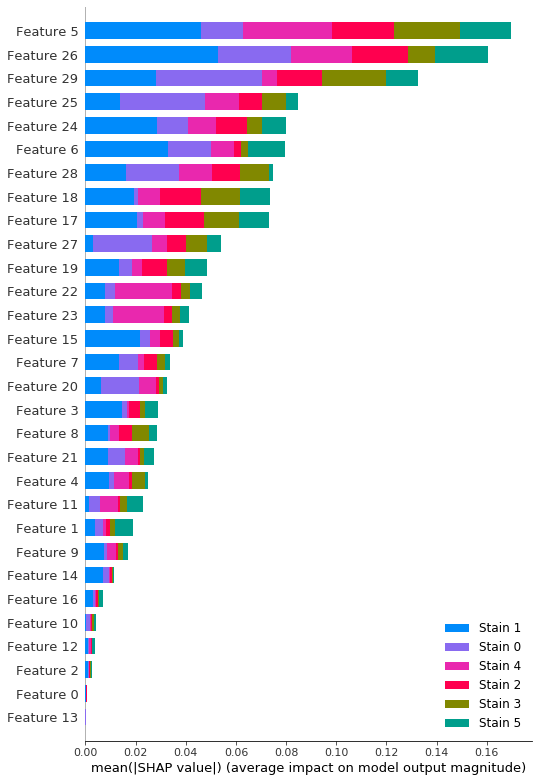

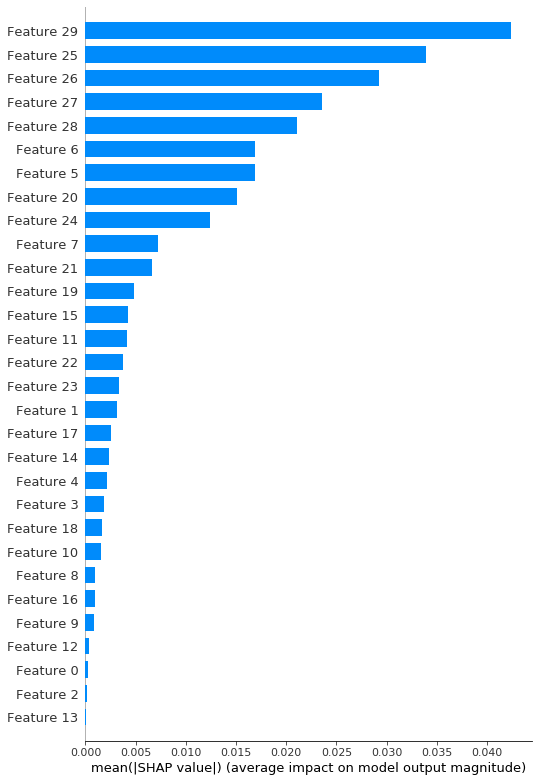

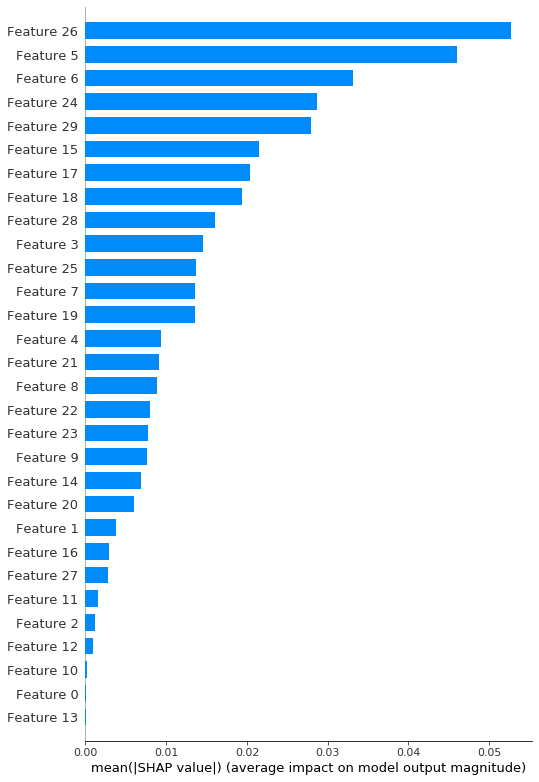

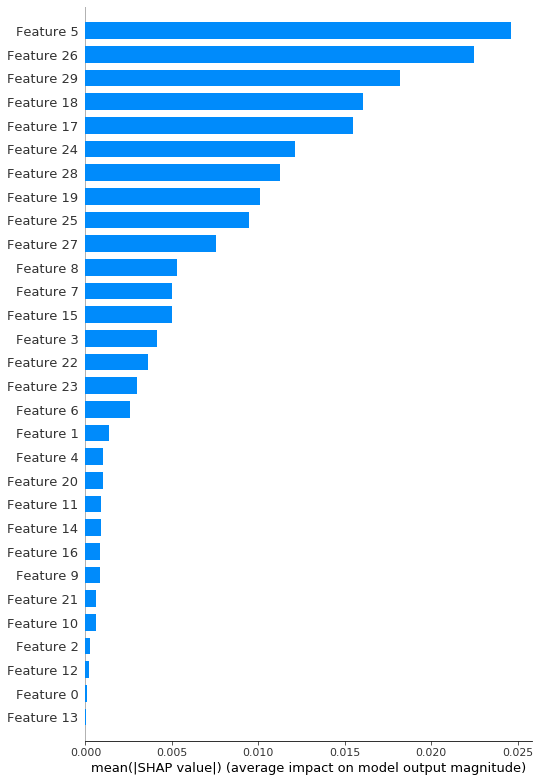

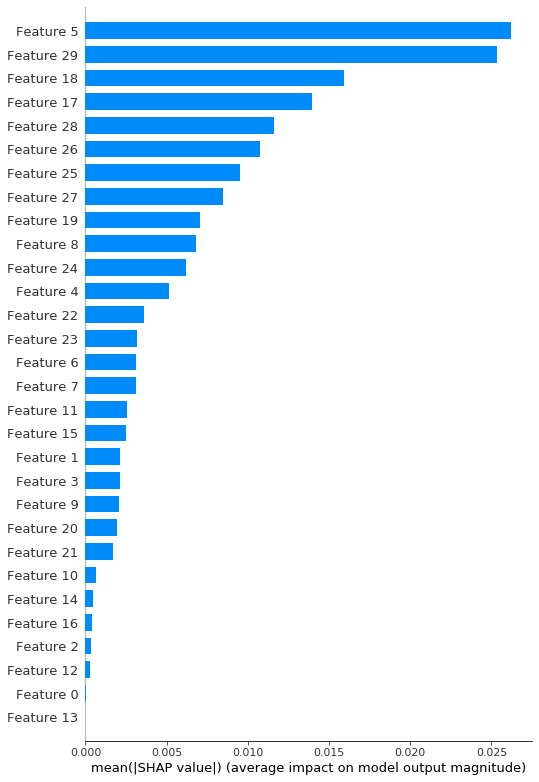

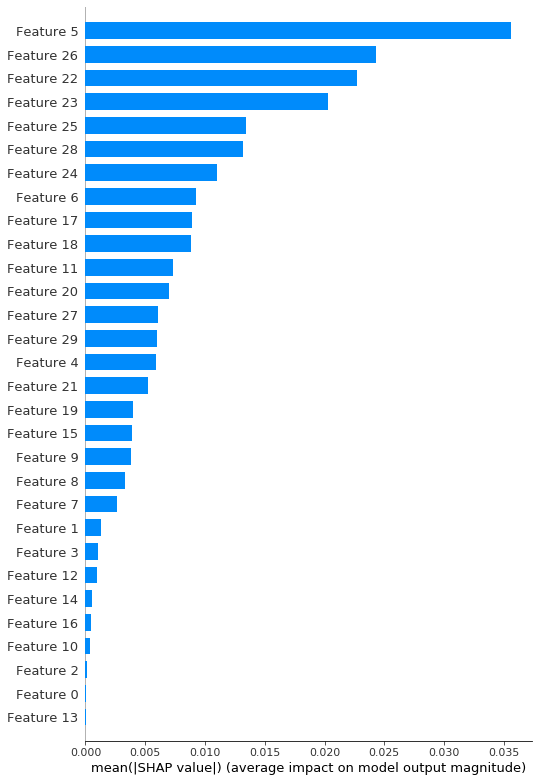

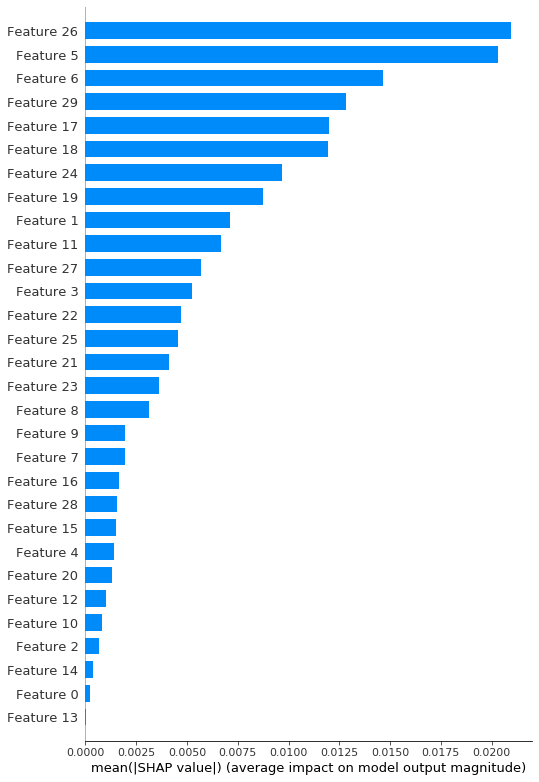

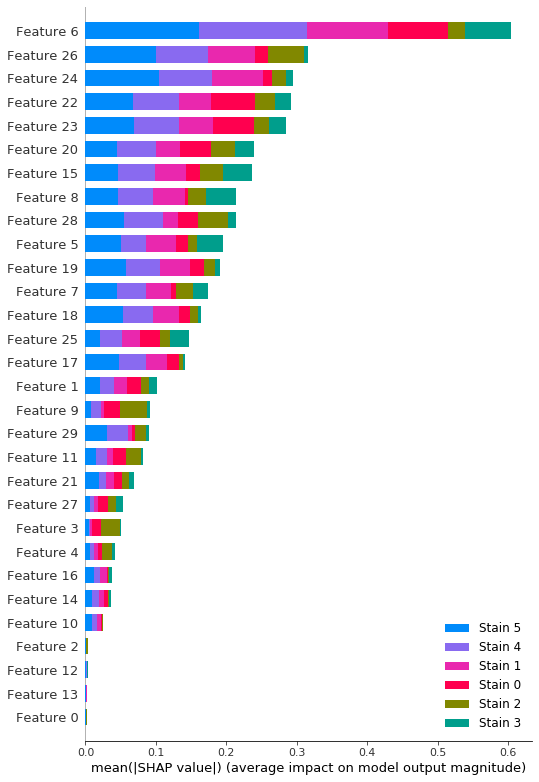

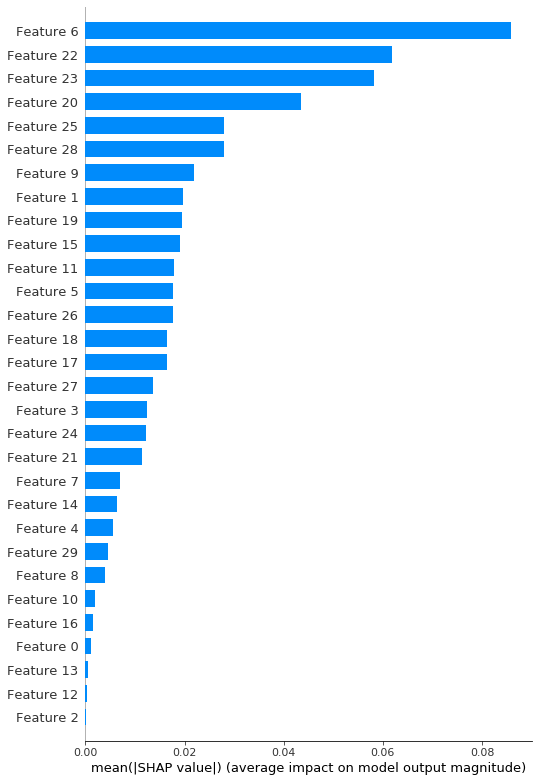

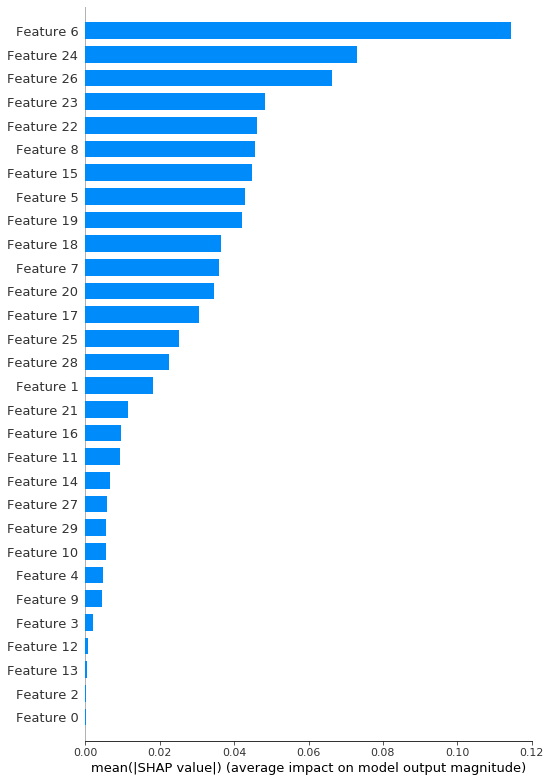

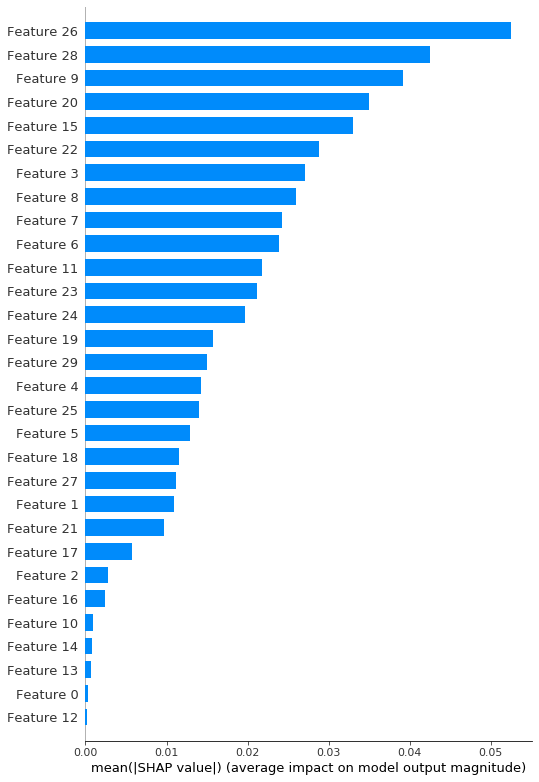

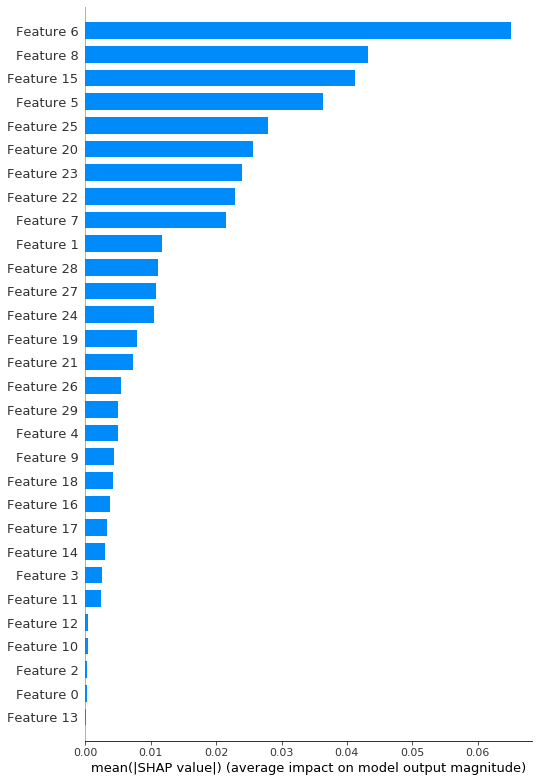

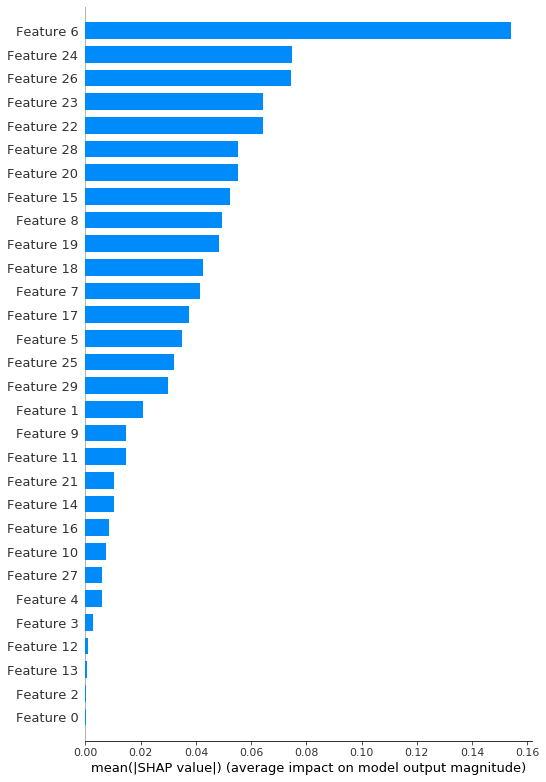

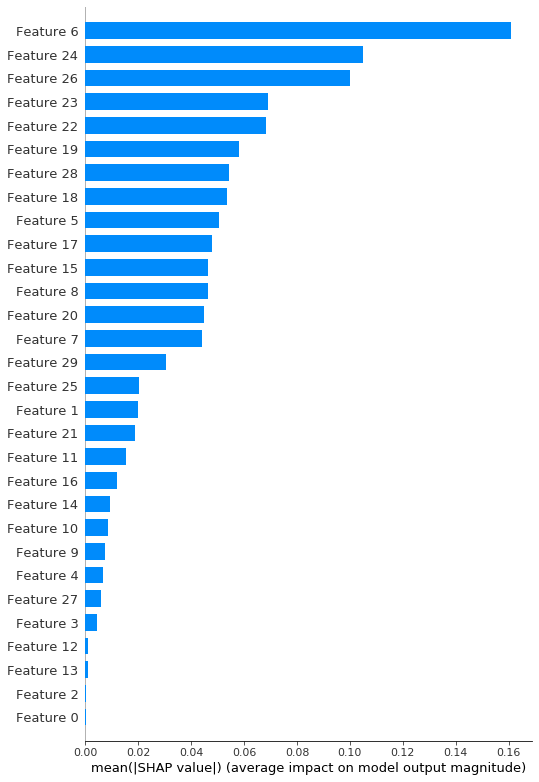

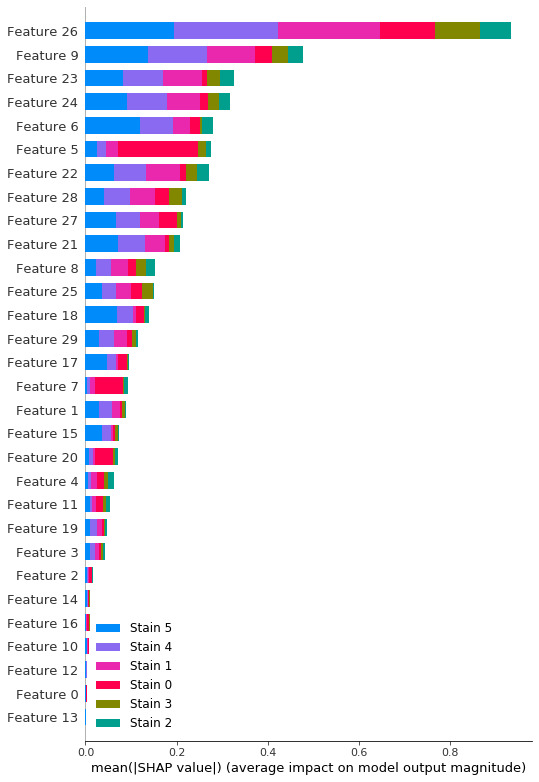

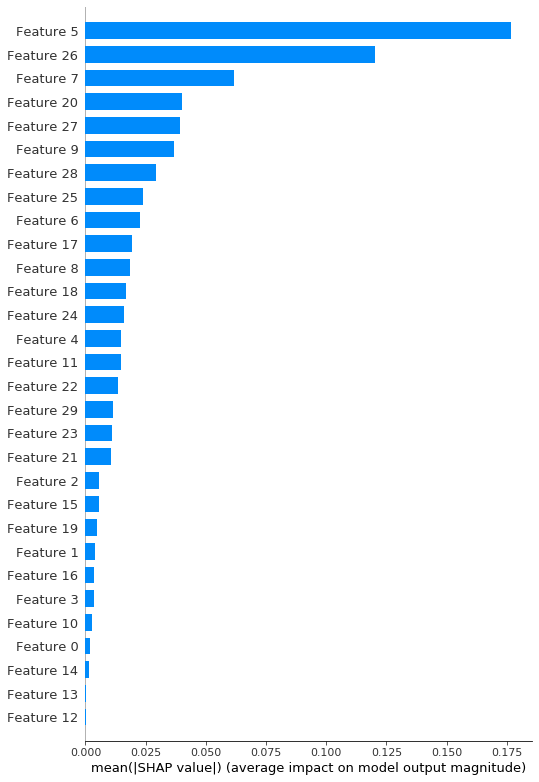

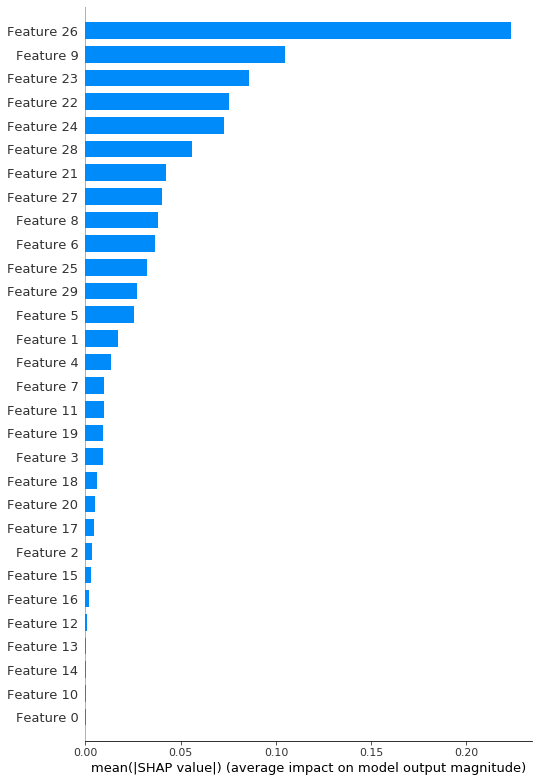

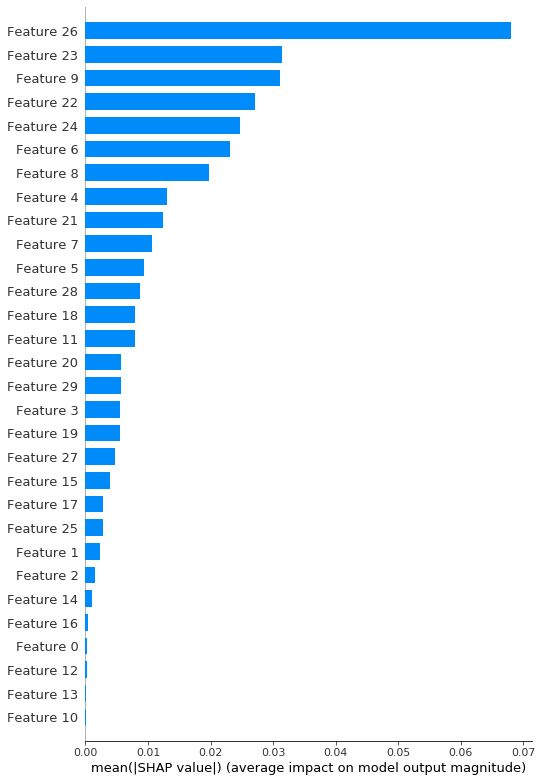

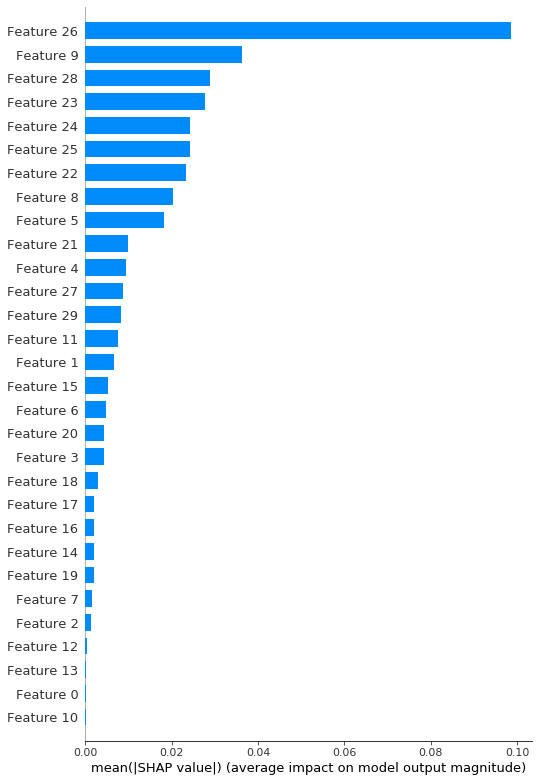

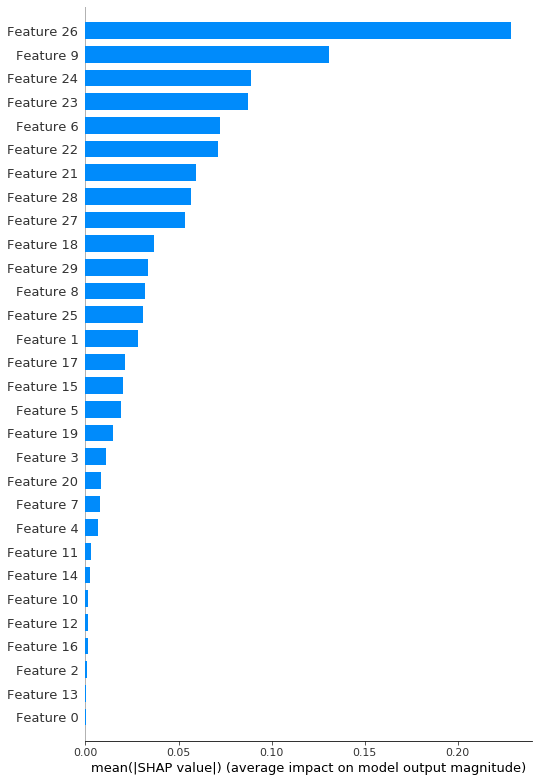

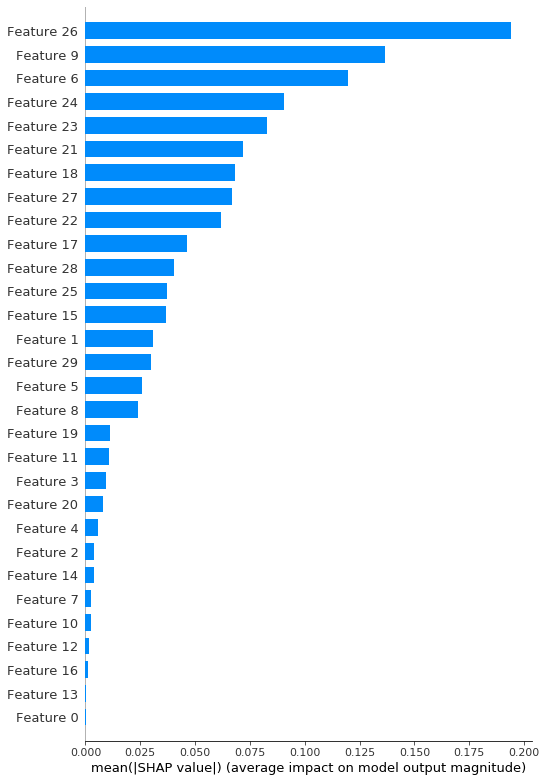

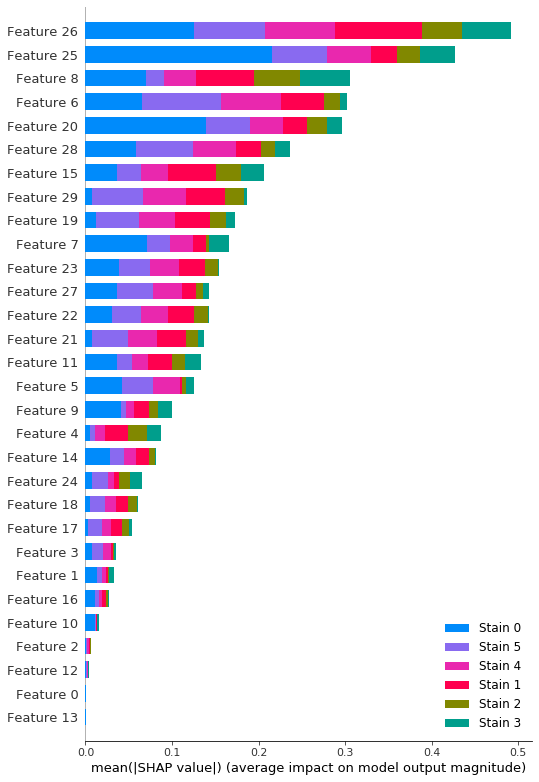

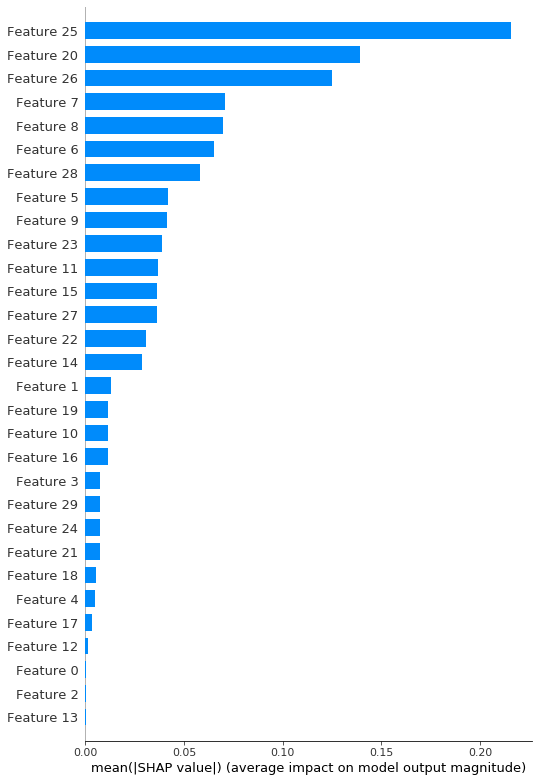

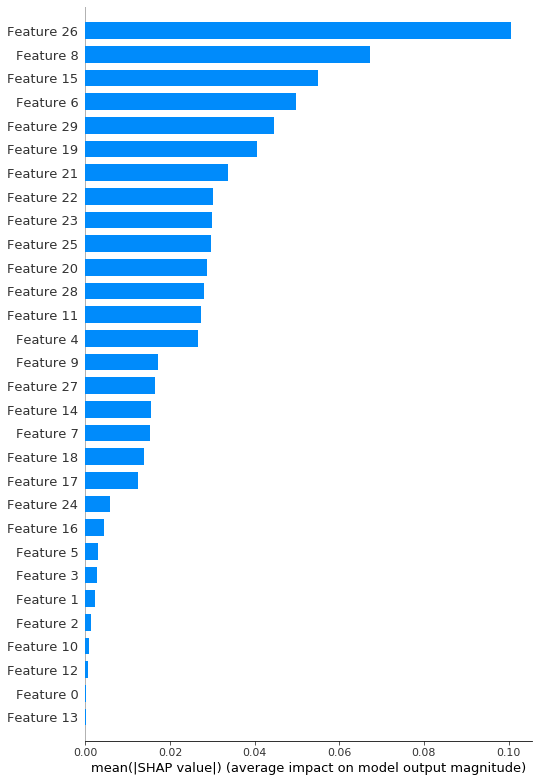

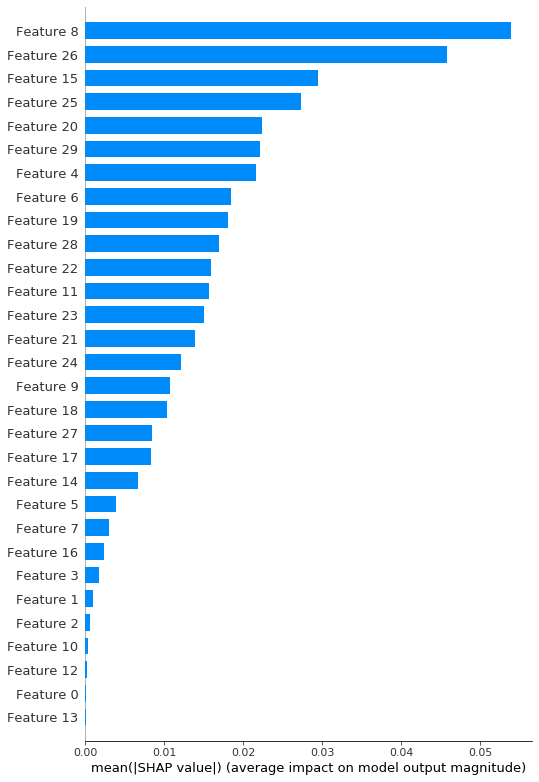

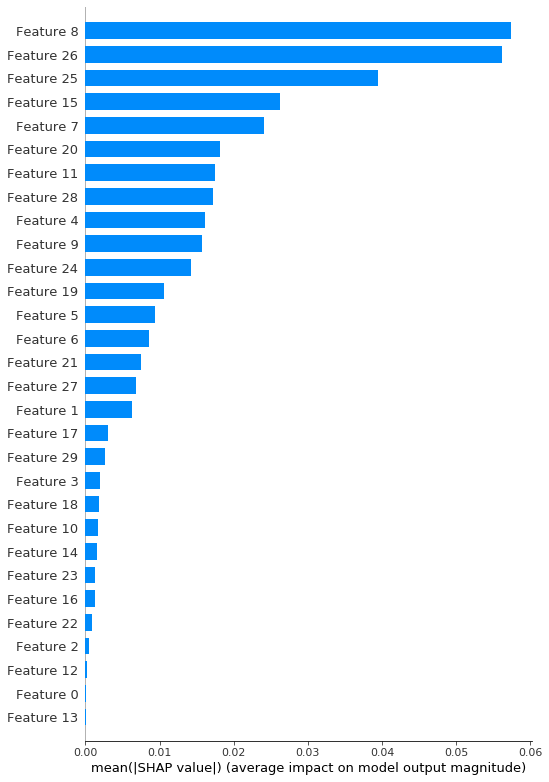

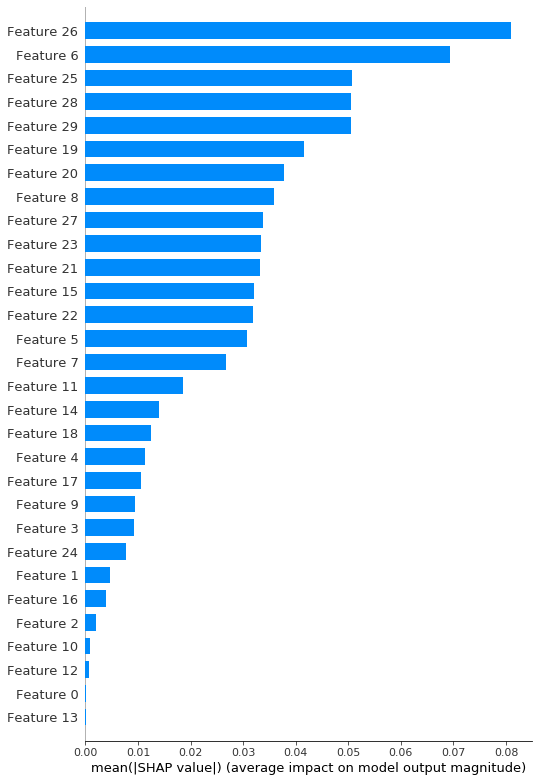

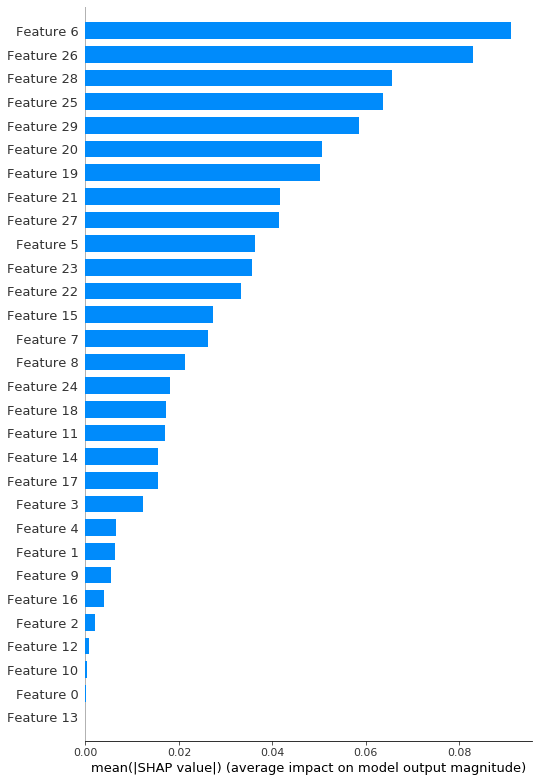

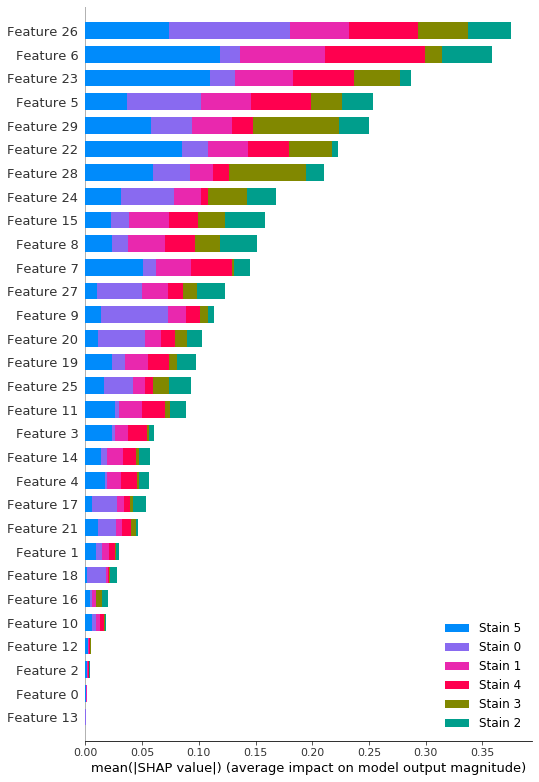

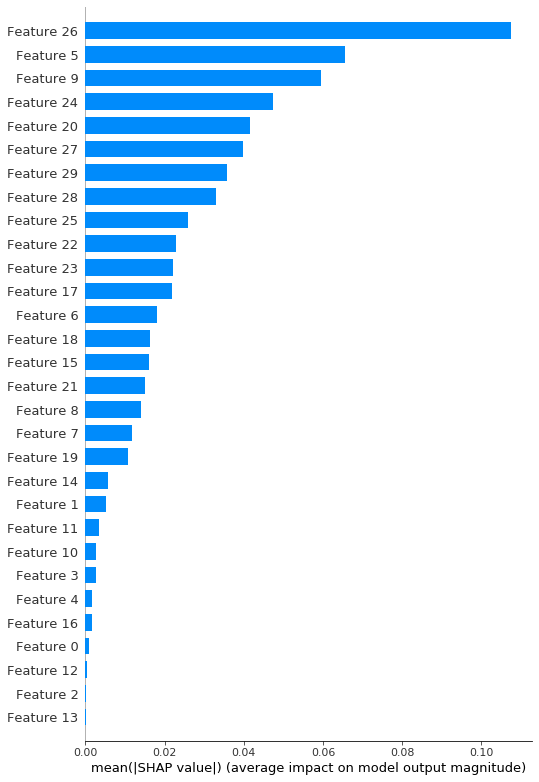

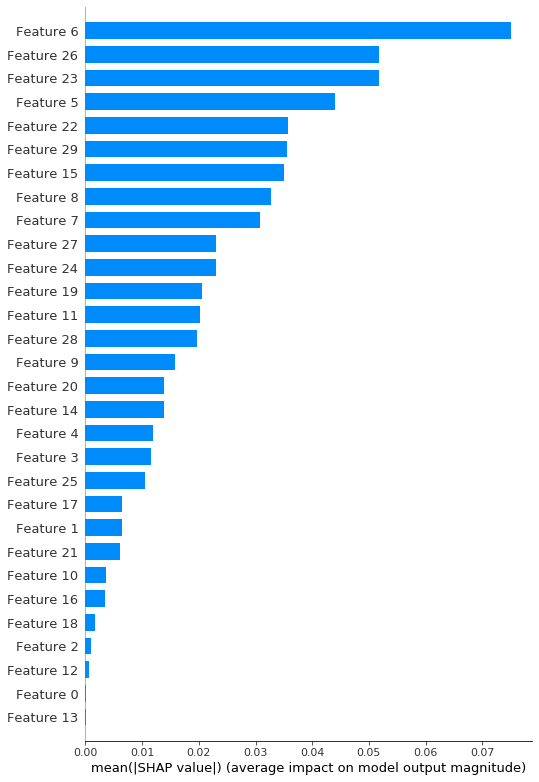

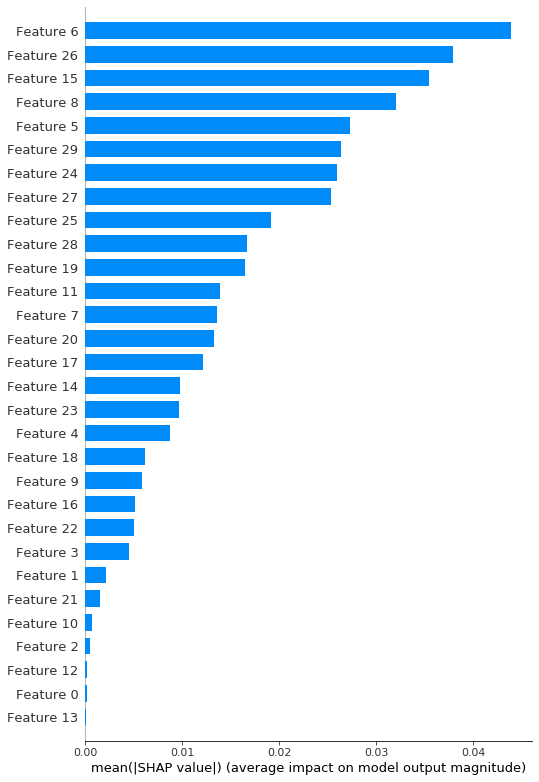

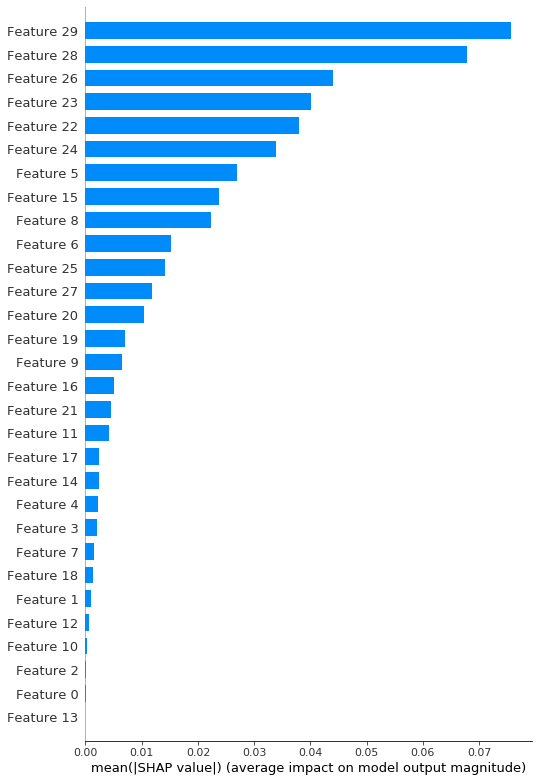

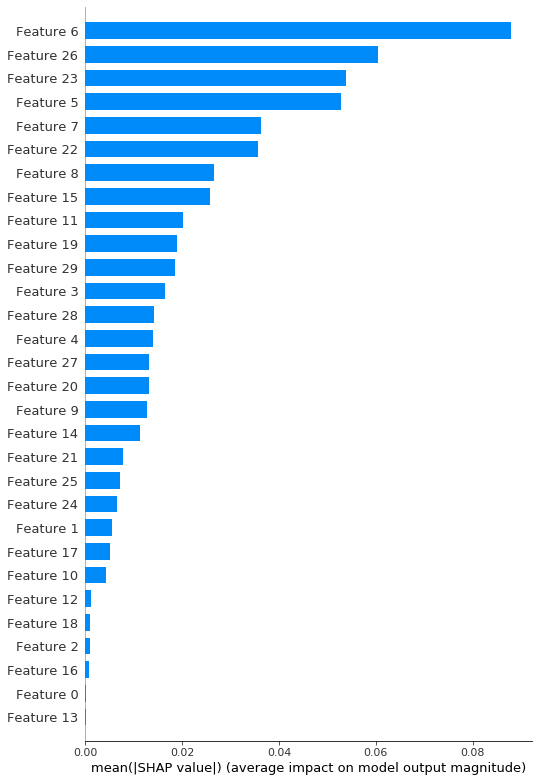

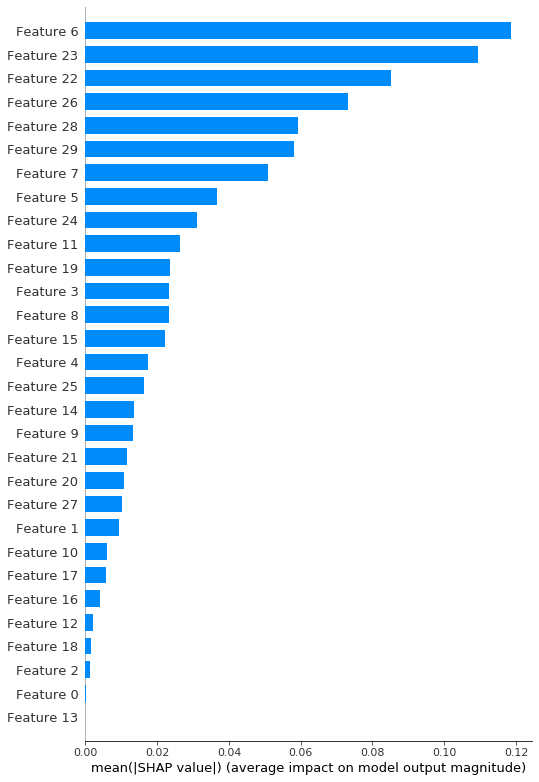

In [127]:
plane_num=['P123','P124','P125','P126','P127']
for plane in plane_num:
    Data,_ = load_data(plane)
    data =pt.tensor(Data).float()
    model=pt.load("save_MLP_new_model/mlp_model_plane" + str(plane) + ".pt")
    
    shap.initjs()
    background= data[:100]
    test_data= data[:100]
    explainer = shap.DeepExplainer(model,background)
    
    shap_values = explainer.shap_values(test_data)
    plt.figure()
    fig = plt.gcf() # 获取后面图像的句柄
    shap.summary_plot(shap_values=shap_values,
                      features = test_data, # 所有样本的feature的值
                      class_names=['Stain 0','Stain 1','Stain 2','Stain 3','Stain 4','Stain 5'],
                    plot_type = 'bar',
                      max_display=30,
                     show=False)
    plt.savefig('SHAP_'+str(plane)+'.jpg',dpi=500,bbox_inches='tight')
    
    for s in range(6):
        plt.figure()
        fig = plt.gcf() # 获取后面图像的句柄
    
        shap.summary_plot(shap_values=shap_values[s],
                          features = test_data, # 所有样本的feature的值
                        plot_type = 'bar',
                          max_display=30,
                         show=False)
        plt.savefig('SHAP_'+str(plane)+'_strain'+str(s)+'.jpg',dpi=500,bbox_inches='tight')

[***] Plane P123
[***] Data is loaded


[***] Plane P124
[***] Data is loaded


[***] Plane P125
[***] Data is loaded


[***] Plane P126
[***] Data is loaded


[***] Plane P127
[***] Data is loaded


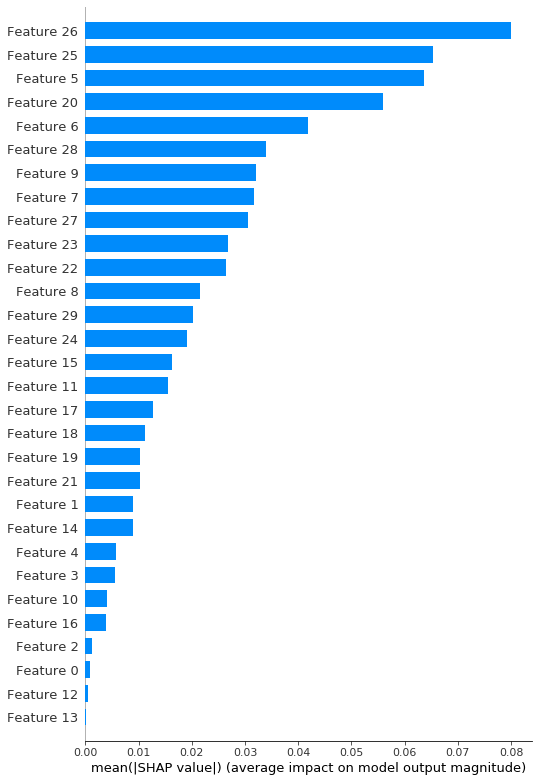

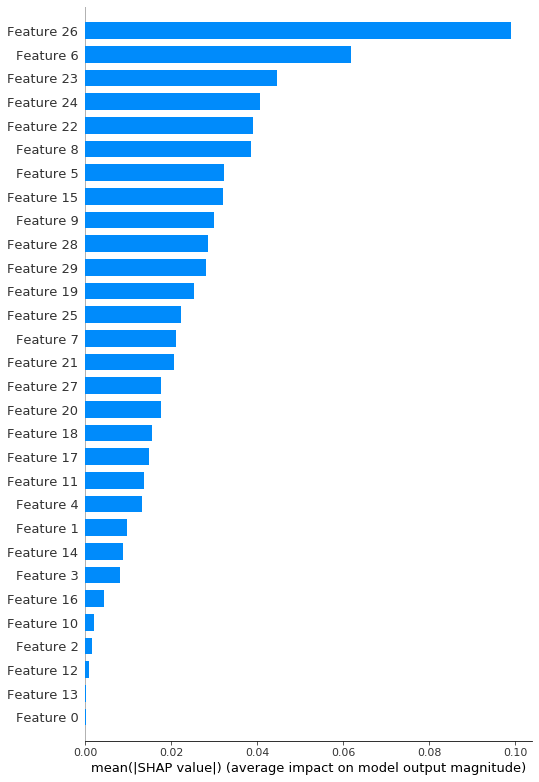

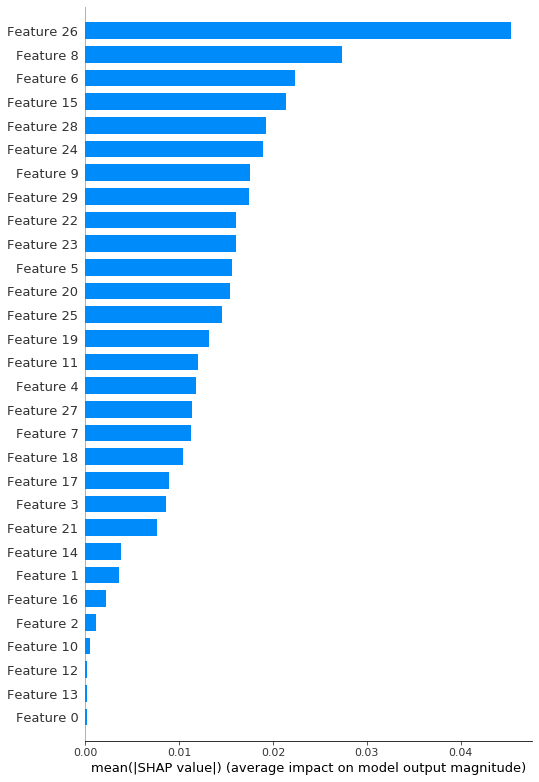

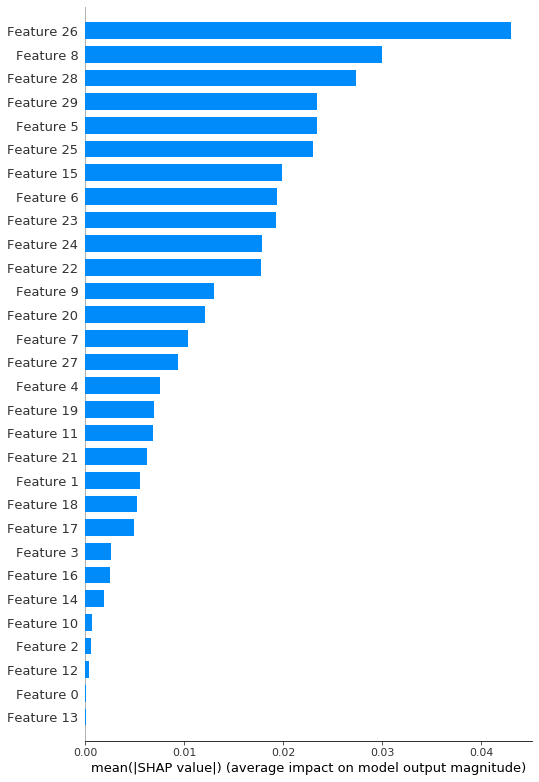

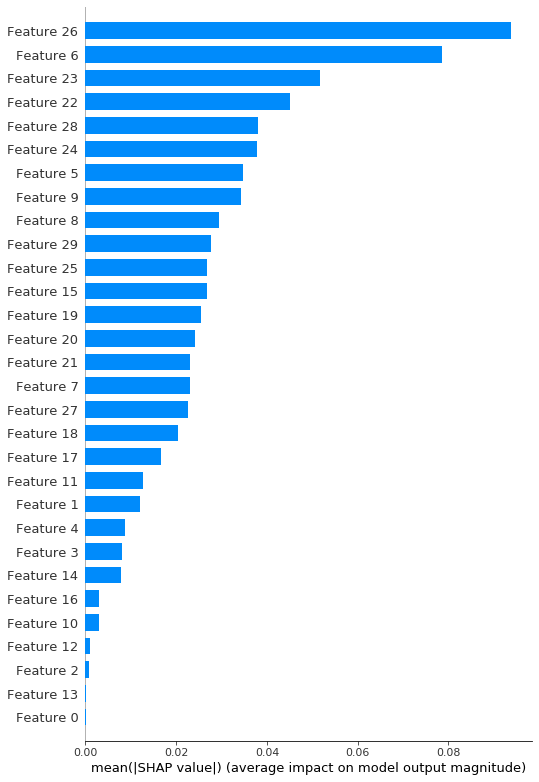

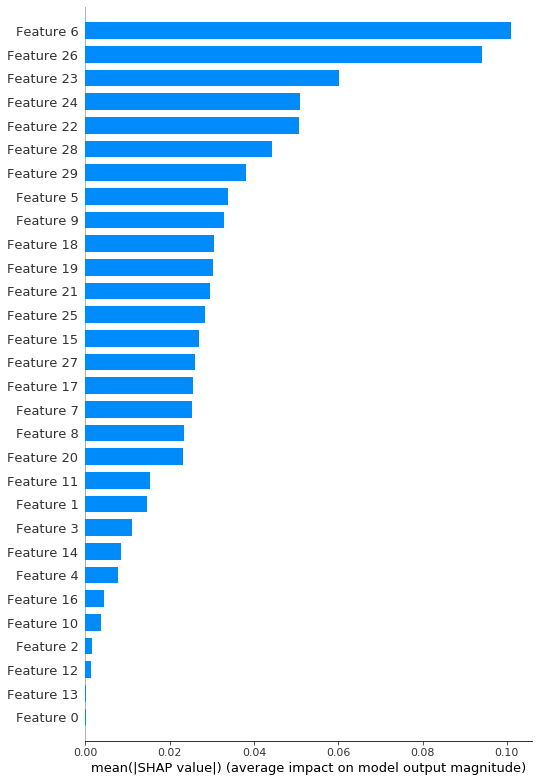

In [178]:
plane_num=['P123','P124','P125','P126','P127']

SHAP_values1=[]
SHAP_values2=[]
SHAP_values3=[]
SHAP_values4=[]
SHAP_values5=[]
SHAP_values6=[]

for plane in plane_num:
    Data,_ = load_data(plane)
    data =pt.tensor(Data).float()
    model=pt.load("save_MLP_new_model/mlp_model_plane" + str(plane) + ".pt")

    shap.initjs()
    background= data[:100]
    test_data= data[:100]
    explainer = shap.DeepExplainer(model,background)

    shap_values = explainer.shap_values(test_data)

    SHAP_values1.extend(shap_values[0].tolist())
    SHAP_values2.extend(shap_values[1].tolist())
    SHAP_values3.extend(shap_values[2].tolist())
    SHAP_values4.extend(shap_values[3].tolist())
    SHAP_values5.extend(shap_values[4].tolist())
    SHAP_values6.extend(shap_values[5].tolist())

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values1),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain1.jpg',dpi=500,bbox_inches='tight')

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values2),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain2.jpg',dpi=500,bbox_inches='tight')

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values3),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain3.jpg',dpi=500,bbox_inches='tight')

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values4),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain4.jpg',dpi=500,bbox_inches='tight')

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values5),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain5.jpg',dpi=500,bbox_inches='tight')

plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=np.array(SHAP_values6),
                  features = test_data, # 所有样本的feature的值
                plot_type = 'bar',
                  max_display=30,
                 show=False)
plt.savefig('SHAP_Strain6.jpg',dpi=500,bbox_inches='tight')





In [50]:
plane='P123'
Data,_ = load_data(plane)
data =pt.tensor(Data).float()
model=pt.load("save_MLP_new_model/mlp_model_plane" + str(plane) + ".pt")
shap.initjs()
background= data[:100]
explainer = shap.DeepExplainer(model,background)

test_data = data[:100]
shap_values = explainer.shap_values(test_data)
print(shap_values)

[array([[ 2.76636129e-04, -7.92721007e-03, -1.42397272e-04, ...,
        -5.65197319e-02, -4.24768813e-02, -1.45496666e-01],
       [ 2.08869955e-04, -4.55224374e-03, -2.66757619e-04, ...,
        -6.33522496e-02, -4.41031680e-02, -1.32771820e-01],
       [ 2.13774314e-04, -4.01359890e-03, -2.10242142e-04, ...,
        -5.70888817e-02, -5.73397316e-02, -1.08584777e-01],
       ...,
       [ 6.92721514e-04,  5.85328043e-03,  3.40744446e-04, ...,
        -2.87141874e-02,  1.84806623e-02,  2.35777907e-02],
       [ 6.98390824e-04,  5.53619303e-03,  5.85392816e-04, ...,
        -3.30679715e-02,  1.76042076e-02,  2.37812679e-02],
       [ 7.64271768e-04,  6.62276195e-03,  5.10844751e-04, ...,
        -3.23321521e-02,  1.81582272e-02,  2.19666380e-02]]), array([[-9.10508388e-05, -1.11263581e-02, -1.09160366e-03, ...,
        -5.29717328e-03, -5.59962541e-02, -1.21017501e-01],
       [-4.27480882e-05, -8.82119592e-03, -1.16256799e-03, ...,
        -3.05700768e-03, -5.74531257e-02, -1.10080630

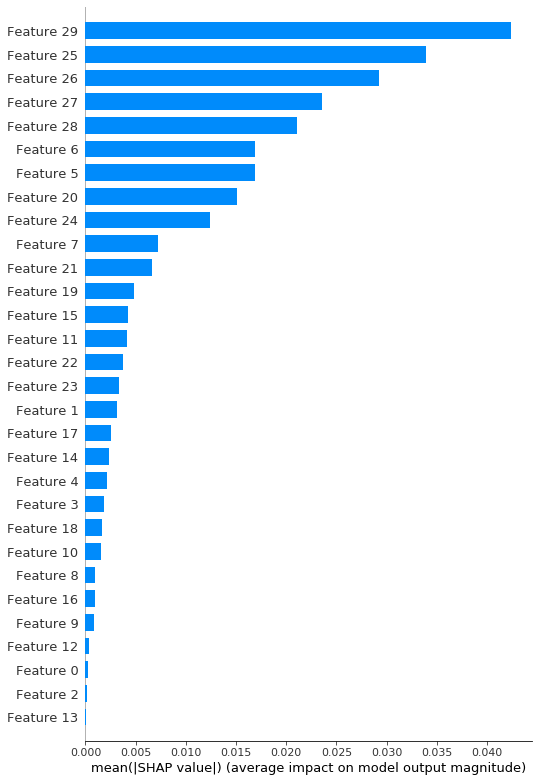

<Figure size 432x288 with 0 Axes>

In [124]:
plt.figure()
fig = plt.gcf() # 获取后面图像的句柄
shap.summary_plot(shap_values=shap_values,
                  features = test_data, # 所有样本的feature的值
                  class_names=['Stain 0','Stain 1','Stain 2','Stain 3','Stain 4','Stain 5'],
                  plot_type = 'bar',
                  max_display=30,
                  show=True)
plt.savefig('SHAP_'+str(plane)+'.jpg',dpi=500,bbox_inches='tight')

In [180]:
for i in [26,6,23,22,24]:
    print(feature[i])

左内副翼
侧滑角
右前襟
左前襟
左外副翼


In [119]:
SHAP_strain1=pd.DataFrame(shap_values[0],columns=feature)
SHAP_strain2=pd.DataFrame(shap_values[1],columns=feature)
SHAP_strain3=pd.DataFrame(shap_values[2],columns=feature)
SHAP_strain4=pd.DataFrame(shap_values[3],columns=feature)
SHAP_strain5=pd.DataFrame(shap_values[4],columns=feature)
SHAP_strain6=pd.DataFrame(shap_values[5],columns=feature)
SHAP_strain=pd.concat([SHAP_strain1,SHAP_strain2,SHAP_strain3,SHAP_strain4,SHAP_strain5,SHAP_strain6])

In [120]:
SHAP_strain3=pd.DataFrame(np.array(SHAP_strain3.sum().tolist()).reshape(1,30),columns=feature)
SHAP_strain3.sort_values(by=0,axis=1,ascending=False,inplace=True)

In [122]:
SHAP_strain3

右外副翼          右内副翼            动压        俯仰角加速度           左前襟  \
0  4.441245e-08  4.015601e-08  3.974492e-08  1.207809e-08  1.151056e-08   

            左鸭翼           右前襟           真空速          俯仰速率          升降速度  \
0  1.065200e-08  1.011722e-08  8.691131e-09  8.187271e-09  6.490154e-09   

           滚转速率         偏航加速度          气压高度          偏航速率           航向角  \
0  2.386514e-09  1.638625e-09  8.012648e-10  4.201866e-10  8.490986e-12   

            滚转角          轴向过载          全机重量          法向过载           马赫数  \
0 -1.309672e-10 -5.584297e-10 -8.462848e-10 -1.994522e-09 -2.002707e-09   

            俯仰角          左方向舵          侧向过载        滚转角加速度          左外副翼  \
0 -3.517926e-09 -7.504241e-09 -1.024483e-08 -1.058288e-08 -1.396984e-08   

            侧滑角           右鸭翼            攻角          左内副翼          右方向舵  
0 -1.516855e-08 -2.270099e-08 -3.358582e-08 -5.880429e-08 -6.833579e-08

In [180]:
best_acc=[0.38976773619651794, 0.14949646592140198, 0.050245819985866545, 0.05775656998157501, 0.04830895438790321]
best_acc=[i/6 for i in best_acc]
np.mean(best_acc)

0.02318585154910882

In [39]:
plane='P127'
with open('save_MLP_new_model/plane'+str(plane)+'loss_list.seqs', 'rb') as f:
    loss=pickle.load(f)
with open('save_MLP_new_model/plane' + str(plane) + 'uncertainty_list.seqs', 'rb') as f:
    uncertainty_list = pickle.load(f)

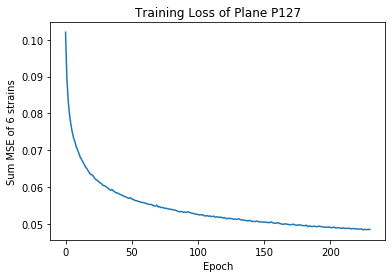

In [168]:
x_epoch=[x for x in range(len(loss))]
plt.plot(x_epoch, loss)
plt.xlabel('Epoch')
plt.ylabel('Sum MSE of 6 strains')
plt.title('Training Loss of Plane '+plane)
plt.savefig('MLP_train_loss'+str(plane)+'.jpg', dpi=300)


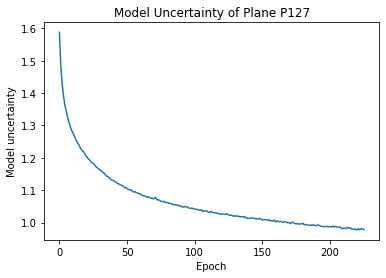

In [40]:
x_epoch=[x for x in range(len(uncertainty_list))]
uncertainty_list=[abs(i) for i in uncertainty_list]
plt.plot(x_epoch, uncertainty_list)
plt.xlabel('Epoch')
plt.ylabel('Model uncertainty')
plt.title('Model Uncertainty of Plane '+plane)
plt.savefig('MLP_train_uncertainty_list'+str(plane)+'.jpg', dpi=300)

In [187]:
LSTM_best_acc=[0.08232355426210747,
 0.0538841412527106,
 0.034021298649965094,
 0.034888768170296465,
 0.03902161908517467]


In [188]:
acc=[0.3958244217069296,
 0.514339226614003,
 0.5483593533123525,
 0.4404417993031737,
 0.7704272721492156,
 0.7465239129959492,
 0.3765150491857614,
 0.4860717255543085,
 0.699604848021058,
 0.4526852577070563,
 0.5001064835577771,
 0.4604977406424944,
 0.19784536929990182,
 0.2576550839652398,
 0.1256563483492745,
 0.20047214080727693,
 0.2295075863269722,
 0.3054558254664232,
 0.2000444924113228,
 0.26827151105663916,
 0.14251936806141827,
 0.2376452539238322,
 0.25669636845263166,
 0.30983875957952994,
 0.1656009425551276,
 0.2575324001456357,
 0.1223238136605577,
 0.1993945117097133,
 0.21330349291805822,
 0.2823908611955262,
 0.3950436645547479,
 0.5116971272921873,
 0.5469096213703283,
 0.4396277052115822,
 0.7711933035120966,
 0.7483389156298499,
 0.37717487045986337,
 0.4854045054191871,
 0.6997286081025043,
 0.4517373939317469,
 0.4990657672956446,
 0.45939763572417264,
 0.19758404657659207,
 0.2583879734328592,
 0.125821493836606,
 0.2005337460886486,
 0.22963845607179928,
 0.3056043620793884,
 0.19975626651426256,
 0.2689670167243588,
 0.14253458160482482,
 0.23664711666567875,
 0.2567963128123087,
 0.3087529294355399,
 0.16526954280395284,
 0.25878051819593195,
 0.12171631023020087,
 0.20015235837712445,
 0.21160591226291442,
 0.28308629043368516,
 0.8214150530174404,
 0.6660073250037757,
 0.6752526612173481,
 0.705029946025714,
 0.7858209486207824,
 0.771149703017555,
 0.8185259045799634,
 0.6667055944824035,
 0.7850054180112607,
 0.6879183330470348,
 0.6736442047248541,
 0.6901398171163343,
 0.8734000695192329,
 0.6768518670977857,
 0.6659969285760525,
 0.6900543787672547,
 0.6655767080926502,
 0.6357054312211522,
 0.8679608557792376,
 0.6833953989301624,
 0.6652643170673942,
 0.6822988642341816,
 0.6651635643822044,
 0.6406815376710333,
 0.85463701516341,
 0.6844139674522487,
 0.6341130091631719,
 0.6637513166128278,
 0.6625216824895819,
 0.6626501325481536,
 0.39462162565128084,
 0.513110910874219,
 0.5467003820225039,
 0.4406635267327956,
 0.7691905660375886,
 0.7499798124642302,
 0.3764898914676383,
 0.4859029466223566,
 0.701801773288697,
 0.45389352394960414,
 0.5010499198145916,
 0.460127700336492,
 0.19758016525026095,
 0.257680509459765,
 0.12579715414700507,
 0.20061858862223794,
 0.2296003425041507,
 0.3055804907618599,
 0.19956474271430538,
 0.26887494094692355,
 0.1421612046116529,
 0.2369993601978216,
 0.2569429840323738,
 0.3088646959860825,
 0.16545270164238943,
 0.2584381603018391,
 0.12223704545576207,
 0.19996316118250707,
 0.21195976084968524,
 0.2828411751057824]

In [192]:
np.mean(acc[90:120])

0.3454896587678134